<a href="https://colab.research.google.com/github/JayaKrishanS/Stock-Sentiment-Analysis-Based-on-News-Headlines-Using-NLP-and-Machine-Learning/blob/main/Stock_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Sentiment Analysis using News Headlines.**

**About the dataset:**

1. The data is taken from Kaggle
2. Data ranges from 2008 to 2016 and the data from 2000 to 2008 was scrapped from Yahoo finance.
3. There are 25 columns of top news headlines for each day in the data frame.
4. Class 1- the stock price increased.
5. Class 0- the stock price stayed the same or decreased.

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [52]:
df = pd.read_csv("Stock_sentiment_analysis.csv", encoding = "ISO-8859-1") #This encoding, also known as Latin-1, is a widely used character encoding that covers many languages, including English, French, Spanish, German, Italian, and others.

In [53]:
df.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite


In [54]:
df.shape

(4101, 27)

In [55]:
print(df.isnull().sum())

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64


In [56]:
# Filling the null values with mode

df['Top23'] = df['Top23'].fillna(df['Top23'].mode().iloc[0])
df['Top24'] = df['Top24'].fillna(df['Top24'].mode().iloc[0])
df['Top25'] = df['Top25'].fillna(df['Top25'].mode().iloc[0])

In [57]:
#Droping the Date column because its not needed for analysis

df.drop('Date', axis = 1, inplace  = True)

<Axes: >

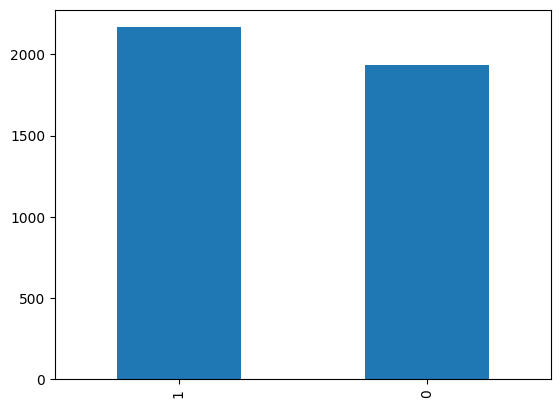

In [58]:
df['Label'].value_counts().plot.bar()

In [59]:
#Feature Engineering

df.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [60]:
df.head(1)

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,0,A hindrance to operations extracts from the...,Scorecard,Hughes instant hit buoys Blues,Jack gets his skates on at ice cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar s debut double,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl s successor drawn into scandal,The difference between men and women,Sara Denver nurse turned solicitor,Diana s landmine crusade put Tories in a panic,Yeltsin s resignation caught opposition flat f...,Russian roulette,Sold out,Recovering a title


In [61]:
features = df.drop('Label', axis = 1)

In [62]:
for i in features:
    df[i] = df[i].str.lower()

In [63]:
df.head(1)

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title


In [64]:
headlines = []
for i in range(0,len(df.index)):
    headlines.append(' '.join(str(x) for x in df.iloc[i,1:26]))

In [65]:
len(headlines)

4101

In [66]:
headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

In [67]:
df["News_lines"] = headlines

In [69]:
df.head(1)

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,News_lines
0,0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,...,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title,a hindrance to operations extracts from the...


In [70]:
columns_to_keep = ["Label", "News_lines"]
Dataset = df[columns_to_keep]

In [71]:
Dataset.head(2)

,Label,News_lines
0,0,a hindrance to operations extracts from the...
1,0,scorecard the best lake scene leader german s...


In [72]:
x = Dataset['News_lines']
y = Dataset['Label']

In [75]:
#spliting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [76]:
x.shape,x_train.shape,x_test.shape

((4101,), (3280,), (821,))

In [87]:
#Transforming the text data to feature vectors
countvector=CountVectorizer(ngram_range=(2,2))
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

In [78]:
x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

In [79]:
x_train_features.shape

(3280, 42130)

In [80]:
model = RandomForestClassifier()

In [81]:
model.fit(x_train_features, y_train)

RandomForestClassifier()

In [84]:
prediction_test = model.predict(x_test_features)
accuracy_test = accuracy_score(y_test, prediction_test)

In [85]:
print("Accuracy on test : ",accuracy_test)

Accuracy on test :  0.49573690621193667
